In [61]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
from dotenv import load_dotenv


In [62]:
load_dotenv()
os.environ.get('TRAINING_DIRECTORY')


'C:/Users/nikla/Documents/Semester6/data/cucumber-dataset-compressed-small/normal-light'

In [63]:
# Set the path to the folders containing the images
# train_dir = './training_data/'
train_dir = os.environ.get('TRAINING_DIRECTORY')

# Define the image size
img_height = 1024
img_width = 1024

# Define the batch size
batch_size = 32


In [ ]:
# Create a training dataset from the images in the training folder
(train_ds, validation_ds) = keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    validation_split=0.2,
    subset="both",
    seed=123,
    shuffle=True,
    image_size=(img_height, img_width),
    batch_size=batch_size)

# Print the number of batches in the training and validation datasets
print("Number of batches in training dataset: %d" %
      tf.data.experimental.cardinality(train_ds))
print("Number of batches in validation dataset: %d" %
      tf.data.experimental.cardinality(validation_ds))


Found 40 files belonging to 2 classes.
Using 32 files for training.
Using 8 files for validation.
Number of batches in training dataset: 4
Number of batches in validation dataset: 1


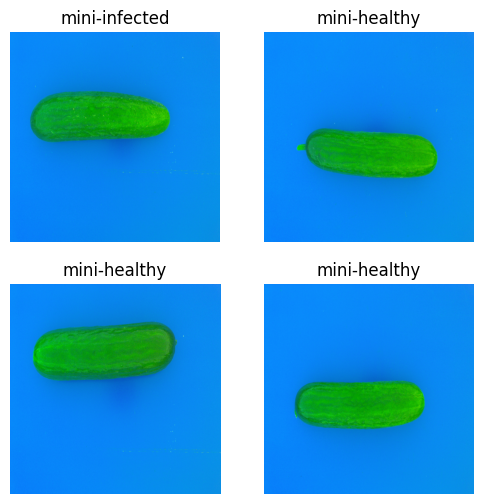

In [70]:
classes = train_ds.class_names

# Plot some images with their labels
plt.figure(figsize=(6, 6))
for images, labels in train_ds.take(1):
    for i in range(4):
        ax = plt.subplot(2, 2, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(classes[labels[i]])
        plt.axis('off')


In [71]:
# Create the model
model = keras.Sequential([
    keras.layers.experimental.preprocessing.Rescaling(
        1./255, input_shape=(img_height, img_width, 3)),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(128, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

# Fit the model to the training dataset
history = model.fit(
    train_ds,
    validation_data=validation_ds,
    batch_size=batch_size,
    epochs=10
)


Epoch 1/10
4/4 [==============================] - 34s 8s/step - loss: 55.9568 - accuracy: 0.5000 - val_loss: 15.6566 - val_accuracy: 0.6250
Epoch 2/10
4/4 [==============================] - 33s 8s/step - loss: 9.8443 - accuracy: 0.4062 - val_loss: 3.6965 - val_accuracy: 0.3750
Epoch 3/10
1/4 [======>.......................] - ETA: 1:17:16 - loss: 4.3680 - accuracy: 0.2500

KeyboardInterrupt: 

In [ ]:
def prediction_to_class(p, classes):
    for (i, x) in enumerate(classes):
        if p < (i+1) * (1 / len(classes)):
            return x;
    return classes[-1]

In [ ]:
test_img_path = f'{train_dir}/mini-healthy/1.jpg'

# Load a new image
new_image = tf.keras.preprocessing.image.load_img(
    test_img_path, target_size=(img_height, img_width))

# Preprocess the image
new_image = tf.keras.preprocessing.image.img_to_array(new_image)
new_image = tf.expand_dims(new_image, axis=0)

# Make a prediction with the model
prediction = model.predict(new_image)
# prediction = prediction_to_class(prediction, classes)
prediction = classes[int(prediction * 2)]
prediction

1/1 [==============================] - 0s 422ms/step


'mini-healthy'